In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = None

In [65]:
recipes = pd.read_csv('Data/recipes_50k.csv')
recipes.dropna(inplace = True)
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50000 non-null  int64  
 1   name           50000 non-null  object 
 2   id             50000 non-null  int64  
 3   minutes        50000 non-null  int64  
 4   tags           50000 non-null  object 
 5   n_steps        50000 non-null  int64  
 6   steps          50000 non-null  object 
 7   description    50000 non-null  object 
 8   ingredients    50000 non-null  object 
 9   n_ingredients  50000 non-null  int64  
 10  calories       50000 non-null  float64
 11  tot_fat        50000 non-null  float64
 12  sugar          50000 non-null  float64
 13  sodium         50000 non-null  float64
 14  protein        50000 non-null  float64
 15  sat_fat        50000 non-null  float64
dtypes: float64(6), int64(5), object(5)
memory usage: 6.5+ MB


In [108]:
recipes = recipes.iloc[:20_000]
recipes_new = recipes.drop(columns = ['Unnamed: 0', 'name', 'id', 'tags', 'description', 'ingredients', 'steps']).copy()
recipes_new = recipes_new.astype('int')

In [88]:
recipes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   minutes        20000 non-null  int32
 1   n_steps        20000 non-null  int32
 2   n_ingredients  20000 non-null  int32
 3   calories       20000 non-null  int32
 4   tot_fat        20000 non-null  int32
 5   sugar          20000 non-null  int32
 6   sodium         20000 non-null  int32
 7   protein        20000 non-null  int32
 8   sat_fat        20000 non-null  int32
dtypes: int32(9)
memory usage: 859.4 KB


### **DBSCAN for Classification**

In [90]:
sc =  StandardScaler()
recipes_new = sc.fit_transform(recipes_new)

In [109]:
db = DBSCAN(eps = 1)
db.fit(recipes_new)

DBSCAN(eps=1)

In [110]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [111]:
silhouette_score(recipes_new, db.labels_)

-0.26826353575029543

In [117]:
recipes_new['clusters'] = db.labels_

In [118]:
recipes_db['clusters']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [79]:
recipes_2 = recipes[:500]
recipes_2.head()

,Unnamed: 0,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,tot_fat,sugar,sodium,protein,sat_fat
0,0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0
1,1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,173.4,18.0,0.0,17.0,22.0,35.0
2,2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,269.8,22.0,32.0,48.0,39.0,27.0
3,3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-day', 'inexpensive', 'brunch', 'superbowl', 'equipment', 

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not clusters

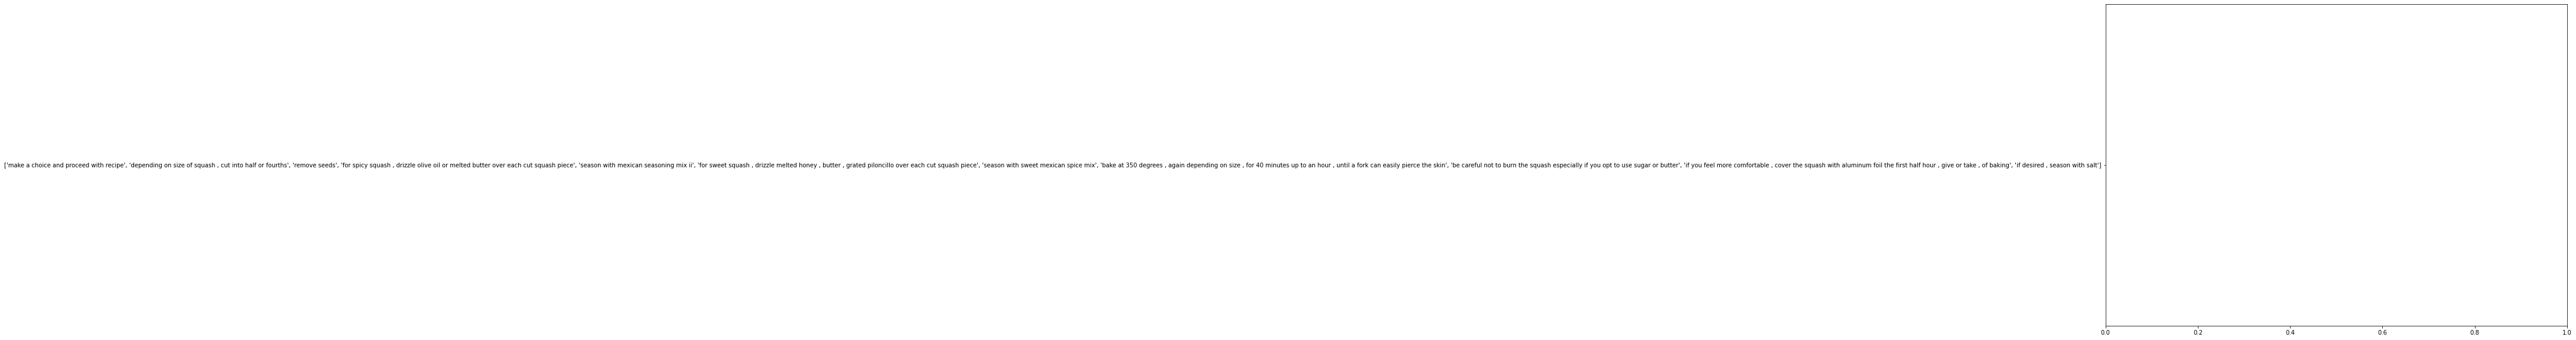

In [80]:
recipes_2.plot(kind = 'scatter', x = 'minutes', y = 'steps', c = 'clusters', cmap = 'coolwarm',
            figsize=(14, 10), s=2);

### **KMeans for Clustering**

In [100]:
recipes_kmeans = recipes_new

In [101]:
km = KMeans(n_clusters = 5)

km.fit(recipes_kmeans)

KMeans(n_clusters=5)

In [102]:
km.labels_

array([1, 1, 0, ..., 3, 0, 1])

In [103]:
silhouette_score(recipes_new, km.labels_)

0.28980167098740783

In [104]:
recipes_kmeans['clusters'] = km.labels_
recipes_kmeans['clusters'].value_counts()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
recipes_kmeans[recipes_kmeans['clusters'] == 0].describe()

,minutes,n_steps,n_ingredients,clusters
count,10928.000000,10928.000000,10928.000000,10928.0
mean,22.395223,7.945461,7.990026,0.0
std,11.547428,4.703874,3.331175,0.0
min,0.000000,1.000000,1.000000,0.0
25%,13.000000,5.000000,6.000000,0.0
50%,23.000000,7.000000,8.000000,0.0
75%,30.000000,10.000000,10.000000,0.0
max,42.000000,76.000000,28.000000,0.0
